In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import itertools
from 

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
#    else:
#        print('Confusion matrix, without normalization')

#    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))
    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

In [39]:
df = pd.read_csv("M:/creditcardfraud/creditcard.csv")

In [40]:
y = np.array(df.Class.tolist())     #classes: 1..fraud, 0..no fraud
df = df.drop('Class', 1)
df = df.drop('Time', 1)     # optional
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))    #optionally rescale non-normalized column
X = np.array(df.as_matrix())

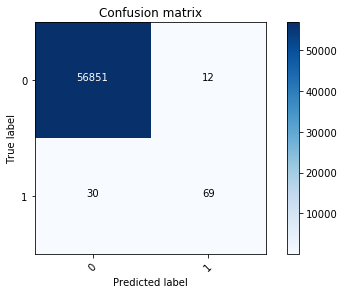

Precision =     0.852
Recall (TPR) =  0.697
Fallout (FPR) = 2.110e-04


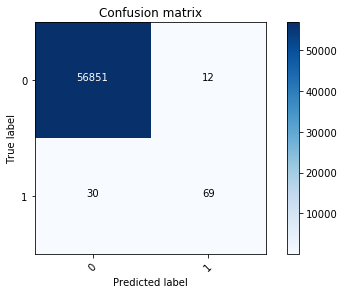

Precision =     0.852
Recall (TPR) =  0.697
Fallout (FPR) = 2.110e-04


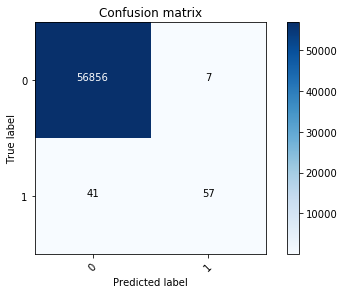

Precision =     0.891
Recall (TPR) =  0.582
Fallout (FPR) = 1.231e-04


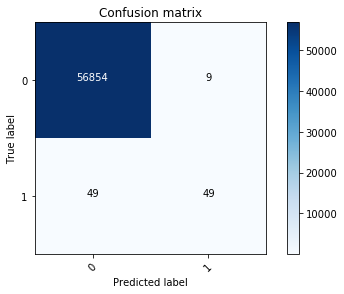

Precision =     0.845
Recall (TPR) =  0.500
Fallout (FPR) = 1.583e-04


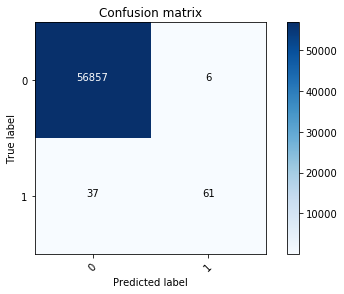

Precision =     0.910
Recall (TPR) =  0.622
Fallout (FPR) = 1.055e-04
Average Precision 86.9920810221 %
Average Recall 61.9604205318 %
Average Fallout 0.0161792378172 %


In [52]:
lrn = LogisticRegression()
pr_array=[]
tpr_array=[]
fpr_array=[]
skf = StratifiedKFold(n_splits = 5, shuffle = True)
for train_index, test_index in skf.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    lrn.fit(X_train, y_train)
    y_pred = lrn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    if lrn.classes_[0] == 1:
        cm = np.array([[cm[1,1], cm[1,0]], [cm[0,1], cm[0,0]]])

    plot_confusion_matrix(cm, ['0', '1'], )
    pr, tpr, fpr = show_data(cm, print_res = 1);
    pr_array.append(pr)
    tpr_array.append(tpr)
    fpr_array.append(fpr)
    

print("Average Precision",np.mean(pr_array)*100,"%")
print("Average Recall",np.mean(tpr_array)*100,"%")
print("Average Fallout",np.mean(fpr_array)*100,"%")